In [ ]:
# ! wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_mild.zip && unzip DIV2K_train_LR_mild.zip
# ! wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_mild.zip && unzip DIV2K_valid_LR_mild.zip
! wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip && unzip DIV2K_train_HR.zip
! wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip && unzip DIV2K_valid_HR.zip

--2024-11-23 07:56:41--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2024-11-23 07:56:41--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  19.5MB/s    in 2m 55s  

2024-11-23 07:59:37 (19.3 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]

Archive:  DIV2K_train_HR.zip
   creating: DIV2K_train_HR/
  inflating: DIV2K_train_HR/0103.png  
  inflating: DIV2K_

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input, BatchNormalization, Activation
from tensorflow.keras.models import Model
import os
from PIL import Image,ImageDraw,ImageEnhance
import numpy as np
import random

In [ ]:
def add_noise_to_images(input_dir, output_dir, scratch_level=0.1, fade_level=0.3, age_level=0.2):
    """
    Adds random noise (scratches, fades, age degradation) to images in the specified directory and saves them to another directory.

    Parameters:
    - input_dir: str, path to the input directory containing high-resolution images.
    - output_dir: str, path to the output directory where noisy images will be saved.
    - scratch_level: float, level of scratches to apply (0.0 to 1.0).
    - fade_level: float, level of fade effect (0.0 to 1.0).
    - age_level: float, level of age degradation effect (0.0 to 1.0).
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")

    total = len(os.listdir(input_dir))
    current = 0

    for filename in os.listdir(input_dir):

        current += 1
        print(f"Progress {current}/{total}: {current/total * 100}%")

        if filename.endswith(('.png', '.jpg', '.jpeg')):
            print(f"Processing image: {filename}")
            img_path = os.path.join(input_dir, filename)
            image = Image.open(img_path).convert('RGB')
            img_array = np.array(image)

            # Add scratches (draw fine white/black lines for scratches)
            num_scratches = int(scratch_level * img_array.size / 100)
            # print(f"Adding {num_scratches} scratches to {filename}")
            draw = ImageDraw.Draw(image)
            for _ in range(num_scratches):
                x_start = random.randint(0, image.size[0] - 1)
                y_start = random.randint(0, image.size[1] - 1)
                x_end = x_start + random.randint(5, 50)  # Scratch length
                y_end = y_start + random.randint(1, 5)   # Scratch width
                line_color = random.choice([(0, 0, 0), (255, 255, 255)])  # Random black or white scratch
                draw.line([(x_start, y_start), (x_end, y_end)], fill=line_color, width=random.randint(1, 3))

            # Add fade effect
            if random.random() < fade_level:
                enhancer = ImageEnhance.Brightness(image)
                fade_factor = random.uniform(0.5, 0.9)  # Randomly reduce brightness
                image = enhancer.enhance(fade_factor)
                # print(f"Applied fade effect with factor: {fade_factor:.2f} to {filename}")

            # Add age degradation
            if random.random() < age_level:
                yellow_filter = np.array([1.2, 1.15, 0.9])  # Slightly increase red and green channels
                img_array = np.clip(np.array(image) * yellow_filter, 0, 255).astype(np.uint8)
                image = Image.fromarray(img_array)
                # print(f"Applied age degradation effect to {filename}")

            noisy_image_path = os.path.join(output_dir, filename)
            image.save(noisy_image_path)
            # print(f"Saved modified image: {filename} to {noisy_image_path}")

    print("Processing complete.")


def resize_images(images):
    resized_images = [tf.image.resize(img, IMG_SIZE).numpy() for img in images]
    return np.array(resized_images)


def load_images_from_directory(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(target_size)
            img = np.array(img) / 255.0  # Normalize to [0,1]
            images.append(img)
    return np.array(images)


In [ ]:
add_noise_to_images('./DIV2K_train_HR', './DIV2K_noise_HR', scratch_level=0.1, fade_level=0.5, age_level=0.3)

Created output directory: ./DIV2K_noise_HR
Progress 1/800: 0.125%
Processing image: 0342.png
Progress 2/800: 0.25%
Processing image: 0437.png
Progress 3/800: 0.375%
Processing image: 0209.png
Progress 4/800: 0.5%
Processing image: 0613.png
Progress 5/800: 0.625%
Processing image: 0739.png
Progress 6/800: 0.75%
Processing image: 0453.png
Progress 7/800: 0.8750000000000001%
Processing image: 0106.png
Progress 8/800: 1.0%
Processing image: 0135.png
Progress 9/800: 1.125%
Processing image: 0742.png
Progress 10/800: 1.25%
Processing image: 0792.png
Progress 11/800: 1.375%
Processing image: 0641.png
Progress 12/800: 1.5%
Processing image: 0077.png
Progress 13/800: 1.625%
Processing image: 0093.png
Progress 14/800: 1.7500000000000002%
Processing image: 0746.png
Progress 15/800: 1.875%
Processing image: 0032.png
Progress 16/800: 2.0%
Processing image: 0637.png
Progress 17/800: 2.125%
Processing image: 0172.png
Progress 18/800: 2.25%
Processing image: 0524.png
Progress 19/800: 2.375%
Processing

In [ ]:
input_dir = './DIV2K_noise_HR'
target_dir = './DIV2K_train_HR'

noisy_images = load_images_from_directory(input_dir)
clean_images = load_images_from_directory(target_dir)

train_noisy, val_noisy = noisy_images[:700], noisy_images[700:]
train_clean, val_clean = clean_images[:700], clean_images[700:]

print(f"Shape of train_noisy: {train_noisy.shape}")
print(f"Shape of train_clean: {train_clean.shape}")
print(f"Shape of val_noisy: {val_noisy.shape}")
print(f"Shape of val_clean: {val_clean.shape}")

#Model1


In [ ]:
def build_sr_model(input_shape=(256, 256, 3)):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(3, (3, 3), padding='same')(x)
    outputs = Activation('sigmoid')(x)

    model = Model(inputs, outputs)
    return model

model = build_sr_model(input_shape=(256, 256, 3))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

print("Model compiled")

IMG_SIZE = (256, 256)

train_noisy_resized = resize_images(train_noisy)
train_clean_resized = resize_images(train_clean)
val_noisy_resized = resize_images(val_noisy)
val_clean_resized = resize_images(val_clean)



In [ ]:
history = model.fit(train_noisy_resized, train_clean_resized,
                    validation_data=(val_noisy_resized, val_clean_resized),
                    epochs=50,
                    batch_size=32)

model.save("image_restoration_model.h5")

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5121 - loss: 0.0422 - val_accuracy: 0.5851 - val_loss: 0.0735
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.6966 - loss: 0.0144 - val_accuracy: 0.6005 - val_loss: 0.0796
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - accuracy: 0.7315 - loss: 0.0128 - val_accuracy: 0.6184 - val_loss: 0.0839
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.7479 - loss: 0.0130 - val_accuracy: 0.5515 - val_loss: 0.0876
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 334ms/step - accuracy: 0.7415 - loss: 0.0123 - val_accuracy: 0.3882 - val_loss: 0.0951
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.7425 - loss: 0.0119 - val_accuracy: 0.4820 - val_loss: 0.0974
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.7586 - loss: 0.0117 - val_accuracy: 0.4817 - val_loss: 0.0982
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.7682 - loss: 0.0121 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


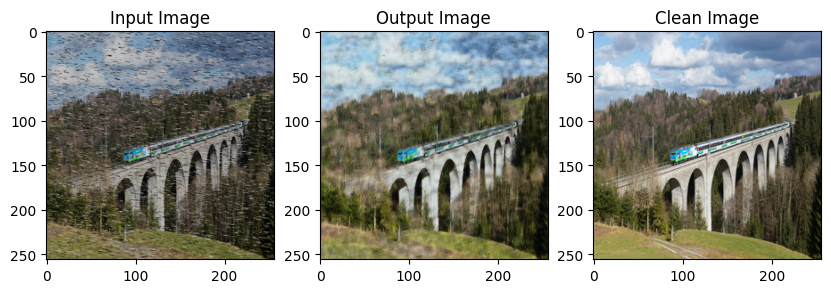

In [ ]:
import matplotlib.pyplot as plt

def display_image_comparison(noisy, predicted, clean):
    plt.figure(figsize=(10, 5))

    # Display noisy image
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(noisy)

    # Display output image
    plt.subplot(1, 3, 2)
    plt.title("Output Image")
    plt.imshow(predicted)

    # Display clean image (ground truth)
    plt.subplot(1, 3, 3)
    plt.title("Clean Image")
    plt.imshow(clean)

    plt.show()

sample_noisy = val_noisy[98]
sample_clean = val_clean[98]

sample_noisy = np.expand_dims(sample_noisy, axis=0)

predicted_image = model.predict(sample_noisy)[0]

display_image_comparison(sample_noisy[0], predicted_image, sample_clean)


#Model2

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
# Parameters
IMG_SIZE = (256, 256, 3)

In [ ]:
def build_unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(128, (3, 3), padding='same', strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Bottleneck
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2DTranspose(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

In [ ]:
def ssim_metric(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

import tensorflow as tf

def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

model = build_unet_model(input_shape=IMG_SIZE)
model.compile(optimizer='adam', loss='mse', metrics=[ssim_metric, psnr_metric])


In [ ]:
# Train the U-Net model
history = model.fit(train_noisy, train_clean, epochs=50, batch_size=16, validation_data=(val_noisy, val_clean))

model.save("image_restoration_diffusion_model.h5")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - loss: 0.0304 - psnr_metric: 16.5110 - ssim_metric: 0.3810 - val_loss: 0.1001 - val_psnr_metric: 10.3909 - val_ssim_metric: 0.3011
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - loss: 0.0128 - psnr_metric: 19.4618 - ssim_metric: 0.5978 - val_loss: 0.1142 - val_psnr_metric: 9.8207 - val_ssim_metric: 0.2833
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 432ms/step - loss: 0.0122 - psnr_metric: 19.6042 - ssim_metric: 0.6294 - val_loss: 0.1372 - val_psnr_metric: 9.0296 - val_ssim_metric: 0.2811
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 424ms/step - loss: 0.0108 - psnr_metric: 20.1200 - ssim_metric: 0.6487 - val_loss: 0.1397 - val_psnr_metric: 8.9339 - val_ssim_metric: 0.2992
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 434ms/step - loss: 0.0104 - psnr_metric: 20.3004 - ssim_metric: 0.6566 - val_loss: 0.1234 - val_psnr_metric: 9.4439 - val_ssim_metric: 0.3118
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 423ms/step - loss: 0.0096 - psnr_metr

In [ ]:
import matplotlib.pyplot as plt

def display_image_comparison(noisy, predicted, clean):
    plt.figure(figsize=(10, 5))

    # Display noisy image
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(noisy)

    # Display output image
    plt.subplot(1, 3, 2)
    plt.title("Output Image")
    plt.imshow(predicted)

    # Display clean image (ground truth)
    plt.subplot(1, 3, 3)
    plt.title("Clean Image")
    plt.imshow(clean)

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


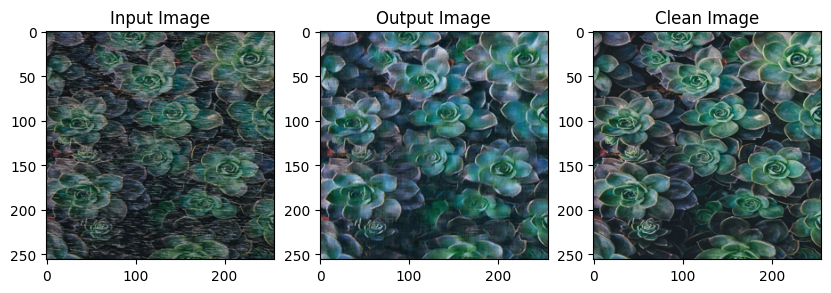

In [ ]:
def show_image(index = 1):
  sample_noisy = val_noisy[index]
  sample_clean = val_clean[index]

  sample_noisy = np.expand_dims(sample_noisy, axis=0)

  predicted_image = model.predict(sample_noisy)[0]

  display_image_comparison(sample_noisy[0], predicted_image, sample_clean)

show_image(49)

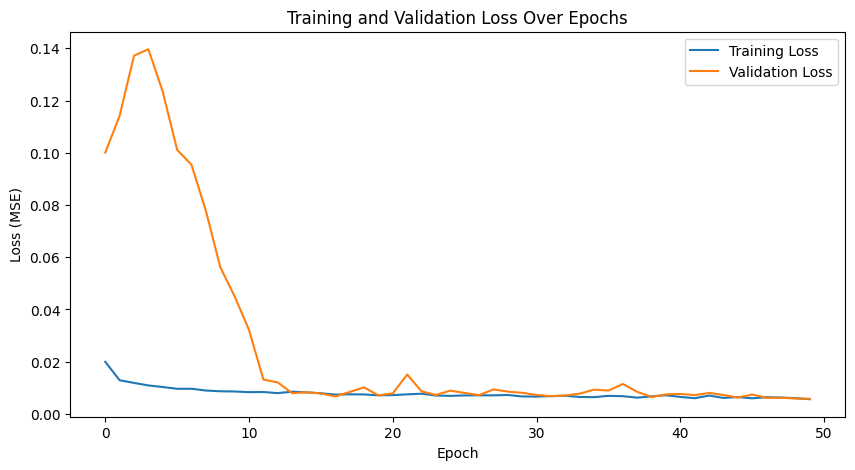

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

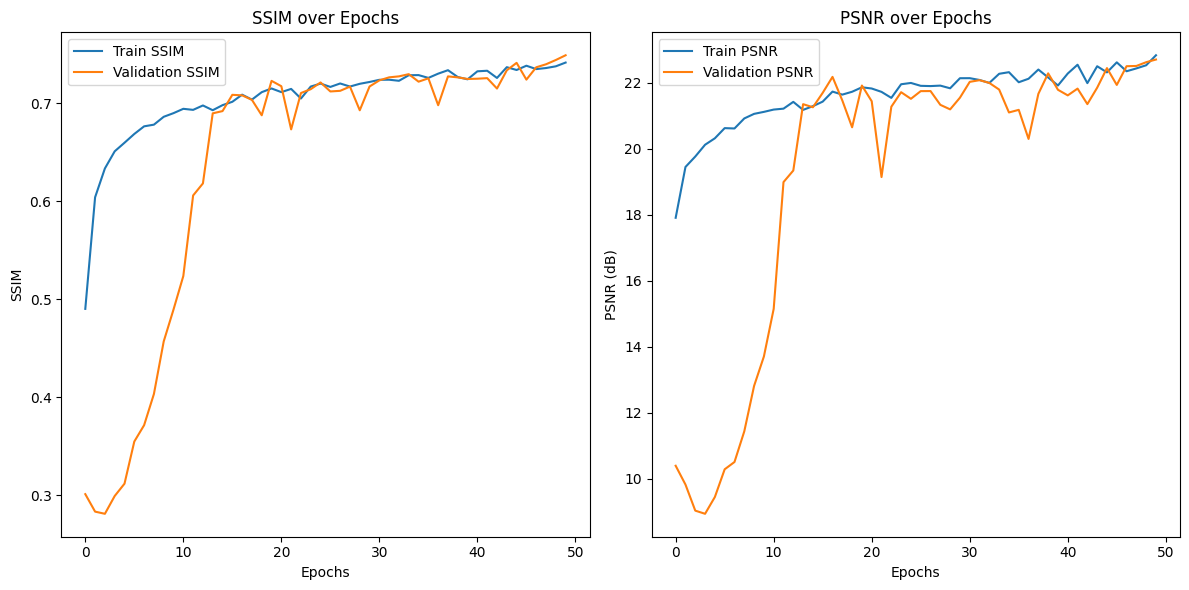

In [ ]:
plt.figure(figsize=(12, 6))

# Plot SSIM
plt.subplot(1, 2, 1)
plt.plot(history.history['ssim_metric'], label='Train SSIM')
plt.plot(history.history['val_ssim_metric'], label='Validation SSIM')
plt.title('SSIM over Epochs')
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.legend()

# Plot PSNR
plt.subplot(1, 2, 2)
plt.plot(history.history['psnr_metric'], label='Train PSNR')
plt.plot(history.history['val_psnr_metric'], label='Validation PSNR')
plt.title('PSNR over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PSNR (dB)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

#Deep Neural Model

In [ ]:
from tensorflow.keras import layers, Model

def build_simplified_unet(input_shape=(256, 256, 3)):
    # Input Layer
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)  # Downsample

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)  # Downsample

    # Bottleneck
    b = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    b = layers.BatchNormalization()(b)

    # Decoder
    u1 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(b)
    u1 = layers.Concatenate()([u1, c2])  # Skip connection
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c3 = layers.BatchNormalization()(c3)

    u2 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
    u2 = layers.Concatenate()([u2, c1])  # Skip connection
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c4 = layers.BatchNormalization()(c4)

    # Output Layer
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='sigmoid')(c4)

    # Model
    model = Model(inputs, outputs)
    return model

# Build and summarize the model
model = build_simplified_unet(input_shape=(256, 256, 3))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 128)  │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 256)    │          1,024 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 128, 128, 128)  │        131,200 │ batch_normalization_2… │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 256)  │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        295,040 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 256, 256, 64)   │         32,832 │ batch_normalization_3… │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 128)  │              0 │ conv2d_transpose_1[0]… │
│ (Concatenate)        

 Total params: 906,435 (3.46 MB)

 Trainable params: 905,155 (3.45 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
def ssim_metric(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

import tensorflow as tf

def psnr_metric(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

model = build_simplified_unet(input_shape=(256,256,3))
model.compile(optimizer='adam', loss='mse', metrics=[ssim_metric, psnr_metric])


In [ ]:
# Train the U-Net model with epochs 40
history = model.fit(train_noisy, train_clean, epochs=40, batch_size=16, validation_data=(val_noisy, val_clean))

model.save("image_restoration_diffusion_deep_model.h5")

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - loss: 0.0352 - psnr_metric: 16.1124 - ssim_metric: 0.4025 - val_loss: 0.0774 - val_psnr_metric: 11.5032 - val_ssim_metric: 0.3313
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 316ms/step - loss: 0.0112 - psnr_metric: 19.9304 - ssim_metric: 0.6062 - val_loss: 0.1560 - val_psnr_metric: 8.3670 - val_ssim_metric: 0.3079
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0110 - psnr_metric: 20.0691 - ssim_metric: 0.6340 - val_loss: 0.2227 - val_psnr_metric: 6.7669 - val_ssim_metric: 0.2912
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - loss: 0.0087 - psnr_metric: 21.0060 - ssim_metric: 0.6624 - val_loss: 0.2271 - val_psnr_metric: 6.6691 - val_ssim_metric: 0.3089
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - loss: 0.0087 - psnr_metric: 21.0417 - ssim_metric: 0.6761 - val_loss: 0.2214 - val_psnr_metric: 6.7338 - val_ssim_metric: 0.3280
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - loss: 0.0082 - psnr_metric:

In [ ]:
import matplotlib.pyplot as plt

def display_image_comparison(noisy, predicted, clean):
    plt.figure(figsize=(10, 5))

    # Display noisy image
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(noisy)

    # Display output image
    plt.subplot(1, 3, 2)
    plt.title("Output Image")
    plt.imshow(predicted)

    # Display clean image (ground truth)
    plt.subplot(1, 3, 3)
    plt.title("Clean Image")
    plt.imshow(clean)

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


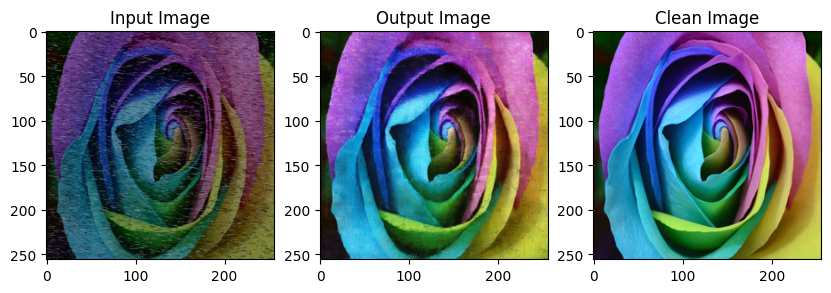

In [ ]:
def show_image(index = 1):
  sample_noisy = val_noisy[index]
  sample_clean = val_clean[index]

  sample_noisy = np.expand_dims(sample_noisy, axis=0)

  predicted_image = model.predict(sample_noisy)[0]

  display_image_comparison(sample_noisy[0], predicted_image, sample_clean)

show_image(45)

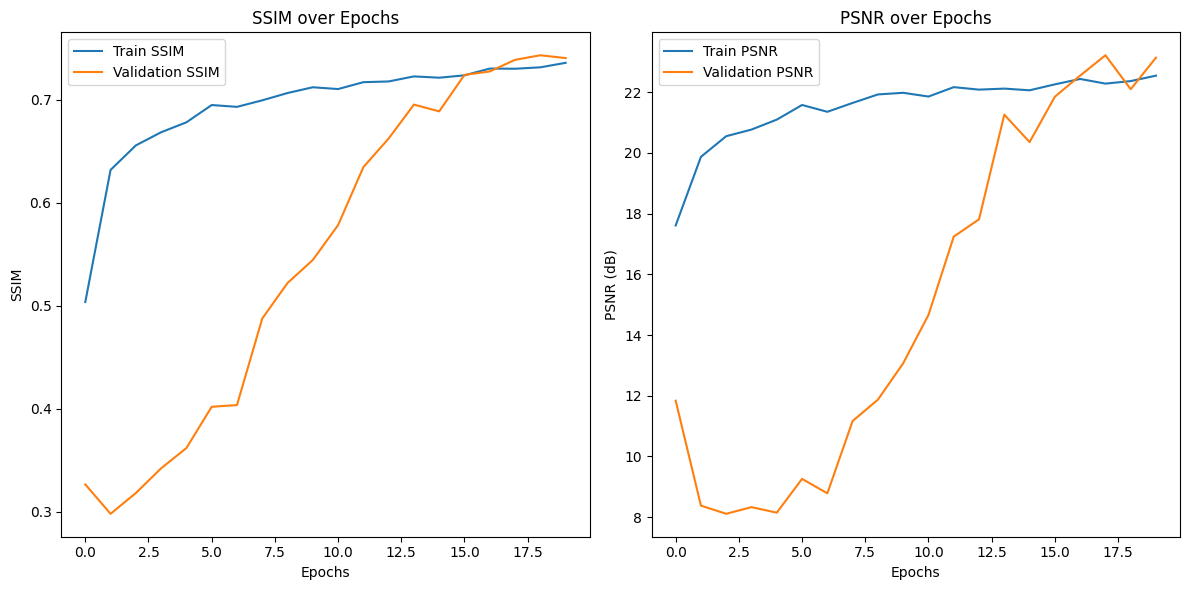

In [ ]:
plt.figure(figsize=(12, 6))

# Plot SSIM
plt.subplot(1, 2, 1)
plt.plot(history.history['ssim_metric'], label='Train SSIM')
plt.plot(history.history['val_ssim_metric'], label='Validation SSIM')
plt.title('SSIM over Epochs')
plt.xlabel('Epochs')
plt.ylabel('SSIM')
plt.legend()

# Plot PSNR
plt.subplot(1, 2, 2)
plt.plot(history.history['psnr_metric'], label='Train PSNR')
plt.plot(history.history['val_psnr_metric'], label='Validation PSNR')
plt.title('PSNR over Epochs')
plt.xlabel('Epochs')
plt.ylabel('PSNR (dB)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()